In [25]:
import numpy as np
import pandas as pd
import ptitprince as pt
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

# import data

In [26]:
raw_t0 = pd.read_excel('C:/Users/u0117545/Documents/GitHub/ULIFT_BC/Output/MoveQual_aff.xlsx', sheet_name = 'T0')
raw_t1 = pd.read_excel('C:/Users/u0117545/Documents/GitHub/ULIFT_BC/Output/MoveQual_aff.xlsx', sheet_name = 'T1')

raw = pd.concat([raw_t0, raw_t1], axis=0, ignore_index=True)
raw.head()

,ppID,trial,time,lyapExp_x,lyapExp_y,lyapExp_z,lyapExp_res,sampen_x,sampen_y,sampen_z,...,rms_z,rms_res,rmsr_x,rmsr_y,rmsr_z,sparc_x,sparc_y,sparc_z,sparc_res,LDLJ_A
0,BC_001,F_R_001,T0,2.930375,2.263738,2.430070,4.791848,0.393388,1.154320,0.382176,...,2.826882,3.803751,0.586549,0.182053,0.789187,-7.654937,-2.816938,-3.854986,-2.283915,-7.216972
1,BC_002,F_L_001,T0,5.116139,1.995793,1.795426,3.769360,0.662254,0.901433,0.618250,...,2.040378,2.933437,0.536986,0.419781,0.731731,-6.988909,-2.754969,-3.667989,-2.082036,-8.139826
2,BC_003,F_R_001,T0,1.218084,1.566631,2.129498,3.993515,0.289993,1.071461,0.437032,...,4.536447,5.981031,0.579549,0.171409,0.796707,-8.970533,-3.052221,-4.419107,-2.426173,-7.075661
3,BC_005,F_R_001,T0,3.005529,2.181107,2.893793,3.471999,0.873687,0.918333,0.448562,...,2.477930,3.312003,0.463193,0.367178,0.806618,-4.273871,-3.174438,-4.746577,-2.449167,-7.608029
4,BC_006,F_R_001,T0,2.283185,2.426332,2.294448,6.419086,0.380532,0.689234,0.319385,...,2.287625,2.977944,0.483472,0.305278,0.820403,-7.682102,-3.185661,-4.669868,-2.433258,-8.376370


In [27]:
len(raw_t0)

22

In [33]:
df = raw.iloc[0:,1:]
df.index = raw.iloc[0:,0]
df.head()

,trial,time,lyapExp_x,lyapExp_y,lyapExp_z,lyapExp_res,sampen_x,sampen_y,sampen_z,sampen_res,...,rms_z,rms_res,rmsr_x,rmsr_y,rmsr_z,sparc_x,sparc_y,sparc_z,sparc_res,LDLJ_A
ppID,,,,,,,,,,,,,,,,,,,,,
BC_001,F_R_001,T0,2.930375,2.263738,2.430070,4.791848,0.393388,1.154320,0.382176,0.436564,...,2.826882,3.803751,0.586549,0.182053,0.789187,-7.654937,-2.816938,-3.854986,-2.283915,-7.216972
BC_002,F_L_001,T0,5.116139,1.995793,1.795426,3.769360,0.662254,0.901433,0.618250,0.741262,...,2.040378,2.933437,0.536986,0.419781,0.731731,-6.988909,-2.754969,-3.667989,-2.082036,-8.139826
BC_003,F_R_001,T0,1.218084,1.566631,2.129498,3.993515,0.289993,1.071461,0.437032,0.437905,...,4.536447,5.981031,0.579549,0.171409,0.796707,-8.970533,-3.052221,-4.419107,-2.426173,-7.075661
BC_005,F_R_001,T0,3.005529,2.181107,2.893793,3.471999,0.873687,0.918333,0.448562,0.786042,...,2.477930,3.312003,0.463193,0.367178,0.806618,-4.273871,-3.174438,-4.746577,-2.449167,-7.608029
BC_006,F_R_001,T0,2.283185,2.426332,2.294448,6.419086,0.380532,0.689234,0.319385,0.368966,...,2.287625,2.977944,0.483472,0.305278,0.820403,-7.682102,-3.185661,-4.669868,-2.433258,-8.376370


In [38]:
df = df.drop('BC_022',0)

C:\Users\u0117545\AppData\Local\Temp/ipykernel_11832/2471533495.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('BC_022',0)


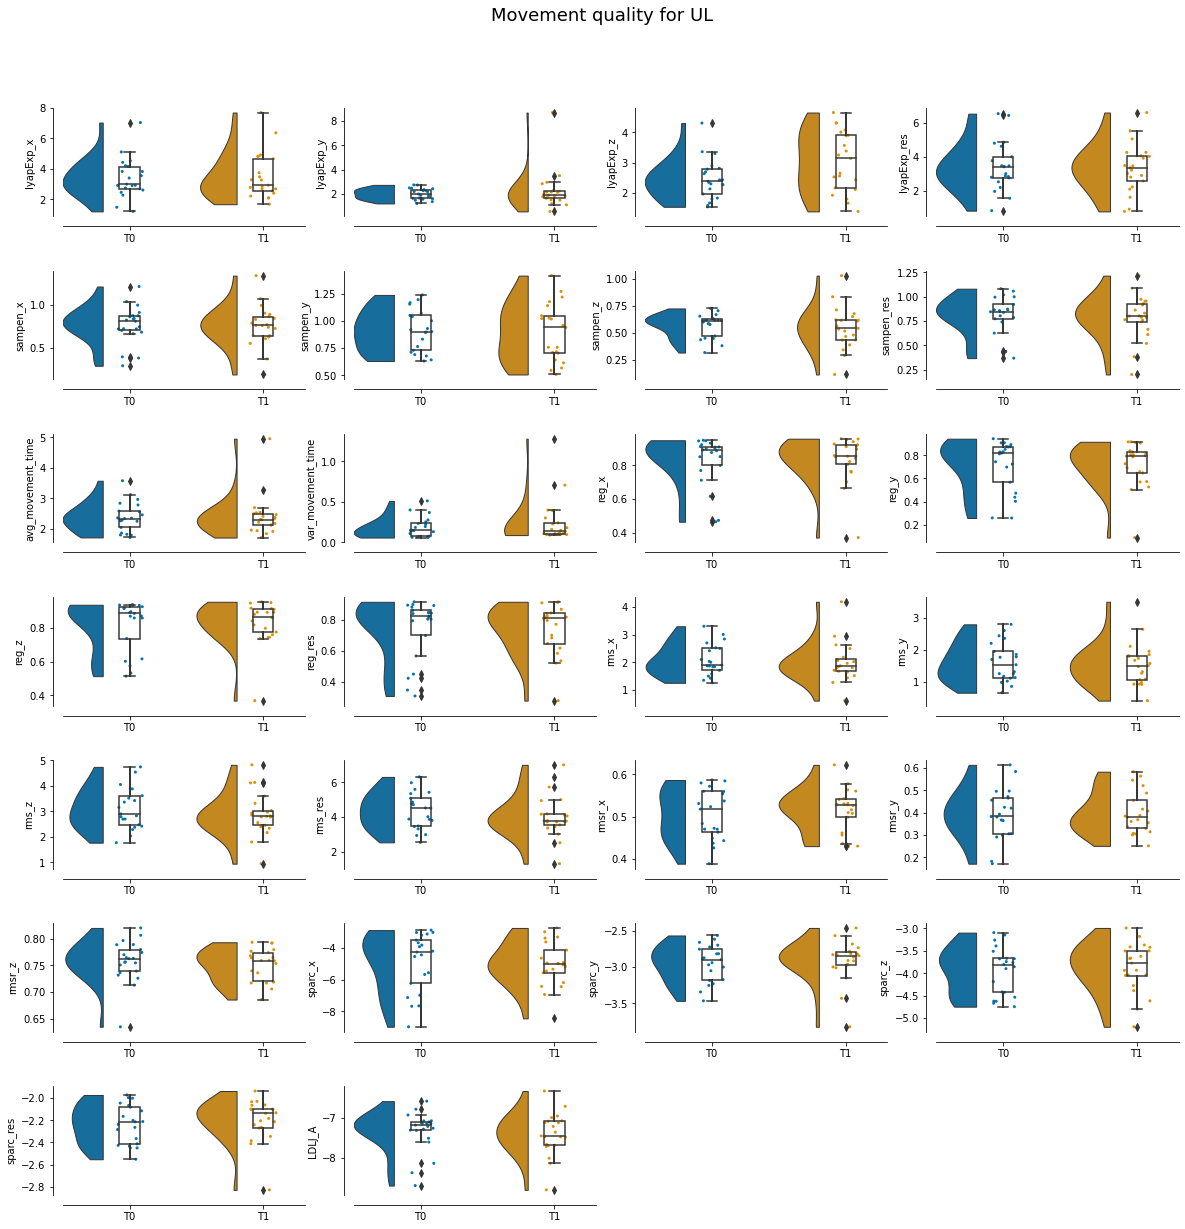

In [39]:
X = df.drop(['trial','time'], axis = 1)
# find minimium required rows given we want 5 columns
ncols = 4
nrows = len(X.columns) // ncols + (len(X.columns) % ncols > 0)
dx = "time"; ort = "v"; pal = 'colorblind'; sigma = .6; viol = .6; mv = .0

f = plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Movement quality for UL", fontsize=18, y=0.95)

f.tight_layout();
offset = 0.1;

for n, columns in enumerate(X.columns):
    # add a new subplot iteratively
    ax = plt.subplot(nrows, ncols, n + 1)
    
    # filter df and plot ticker on the new subplot axis
    #df[df["ticker"] == ticker].plot(ax=ax)
     
    pt.RainCloud(x = dx, y = columns, data = df, ax = ax,
                palette = pal, bw = sigma, width_viol = viol,
                orient = ort, move = mv)
    sns.despine(offset=10)
    ax.set_xlabel('')

Berekening sample entropy:
* tollerantie op basis van het signaal r*std(signaal) --> zeer signaal specifiek

* tollerantie met een vaste waarde r = 0.2 --> mogelijk grotere kans om verschillen te vinden

* tollerantie bepaald op pre-op data en dan diezelfde tollerantie gebruiken voor de pre en post op metingen. --> individueel maar mogelijk toch makkelijker verschil tussen pre en post op te vinden!

# Statistical anlysis
### Pre-op vs Post-op on 20 participants as a first analysis method

In [40]:
# find outliers

In [42]:
T0 = df.loc[df['time']=='T0']
T1 = df.loc[df['time']=='T1']
timepoints = ['T0', 'T1']

for var in df.columns:
    print('Analyzing {}'.format(var))
    if var == 'trial' or var == 'time':
        print(80* "_" + "\n" )
    else:
        t_statistic, pvalue = stats.wilcoxon(T0[var], T1[var])
        print(t_statistic, round(pvalue, ndigits=4))
        
        print(80* "_" + "\n" )
                      
            
        

Analyzing trial
________________________________________________________________________________

Analyzing time
________________________________________________________________________________

Analyzing lyapExp_x
112.0 0.9187
________________________________________________________________________________

Analyzing lyapExp_y
101.0 0.6333
________________________________________________________________________________

Analyzing lyapExp_z
56.0 0.0384
________________________________________________________________________________

Analyzing lyapExp_res
103.0 0.6827
________________________________________________________________________________

Analyzing sampen_x
111.0 0.8917
________________________________________________________________________________

Analyzing sampen_y
115.0 1.0
________________________________________________________________________________

Analyzing sampen_z
83.0 0.2722
________________________________________________________________________________

Analyz

,trial,time,lyapExp_x,lyapExp_y,lyapExp_z,lyapExp_res,sampen_x,sampen_y,sampen_z,sampen_res,...,rms_z,rms_res,rmsr_x,rmsr_y,rmsr_z,sparc_x,sparc_y,sparc_z,sparc_res,LDLJ_A
ppID,,,,,,,,,,,,,,,,,,,,,
BC_001,F_R_001,T0,2.930375,2.263738,2.430070,4.791848,0.393388,1.154320,0.382176,0.436564,...,2.826882,3.803751,0.586549,0.182053,0.789187,-7.654937,-2.816938,-3.854986,-2.283915,-7.216972
BC_002,F_L_001,T0,5.116139,1.995793,1.795426,3.769360,0.662254,0.901433,0.618250,0.741262,...,2.040378,2.933437,0.536986,0.419781,0.731731,-6.988909,-2.754969,-3.667989,-2.082036,-8.139826
BC_003,F_R_001,T0,1.218084,1.566631,2.129498,3.993515,0.289993,1.071461,0.437032,0.437905,...,4.536447,5.981031,0.579549,0.171409,0.796707,-8.970533,-3.052221,-4.419107,-2.426173,-7.075661
BC_005,F_R_001,T0,3.005529,2.181107,2.893793,3.471999,0.873687,0.918333,0.448562,0.786042,...,2.477930,3.312003,0.463193,0.367178,0.806618,-4.273871,-3.174438,-4.746577,-2.449167,-7.608029
BC_006,F_R_001,T0,2.283185,2.426332,2.294448,6.419086,0.380532,0.689234,0.319385,0.368966,...,2.287625,2.977944,0.483472,0.305278,0.820403,-7.682102,-3.185661,-4.669868,-2.433258,-8.376370
BC_007,F_R_001,T0,2.753774,1.612023,4.303666,2.837931,0.701686,0.929221,0.614355,0.857642,...,2.420614,3.481804,0.559413,0.380206,0.736547,-4.448494,-2.884055,-4.535742,-2.165126,-7.314842
BC_008,F_R_001,T0,3.834831,1.480221,1.663549,3.465609,0.681054,0.897372,0.471789,0.626451,...,3.878865,5.426666,0.584437,0.297935,0.754763,-5.573446,-3.230544,-4.626751,-2.412326,-7.104771
BC_009,F_L_001,T0,2.918751,2.471717,2.810934,1.967558,0.719471,0.711186,0.577297,0.847650,...,2.899841,4.017646,0.448999,0.464831,0.763107,-3.932423,-2.899134,-3.678466,-2.201118,-7.183282
BC_010,F_L_001,T0,4.434852,1.643545,2.424039,2.759381,0.859714,0.640850,0.611052,0.773178,...,3.422743,5.082090,0.388507,0.583818,0.712895,-3.833468,-2.940710,-3.806744,-2.002049,-7.153182
